## Этот ноутбук является целиком бонусным

In [67]:
!pip install mlxtend

# Часть SVM

In [10]:
%matplotlib inline

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

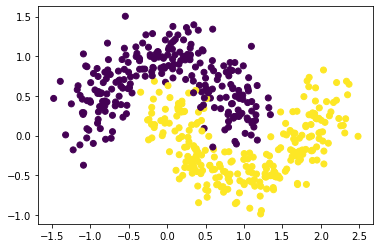

In [11]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

 Попробуйте обучить на этих данных линейный SVM (используйте класс svm.SVC), померяйте качество в терминах метрик, рассмотренных на занятии. Изобразите разделяющую прямую (смотрите примеры в документации sklearn). Какие есть проблемы?

In [12]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

In [13]:
svm = SVC(kernel='linear')
svm.fit(moons_points, moons_labels)

SVC(kernel='linear')

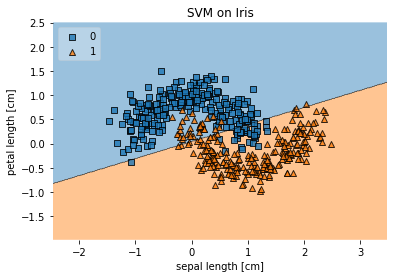

In [14]:
X = moons_points
y = moons_labels

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

Проблемы: объекты не разделяются линейно (видно, что опорных векторов и нарушителей зазора очень много)

In [15]:
svm = SVC(kernel='linear', C=0.001)
svm.fit(moons_points, moons_labels)

SVC(C=0.001, kernel='linear')

<AxesSubplot:>

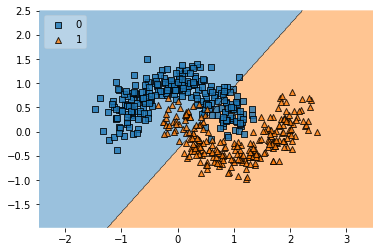

In [16]:
plot_decision_regions(X, y, clf=svm, legend=2)

__Задание (1 балл)__ Применим ядровой переход. Попробуйте перебрать различные ядра (полиномиальное, rbf, сигмоидальное) и важные для них гиперпараметры, оптимизируя f1-меру на обучающих данных. Нарисуйте соответствующие графики зависимости качества от значений разных параметров. Для наилучшего набора измерьте/изобразите все описанные в предыдущих заданиях метрики (на тестовой выборке). Изобразите итоговую разделяющую поверхность для лучшего решения на всей выборке.

Ответьте на следующие вопросы:
- как изменилось качество классификации на тесте?
- какая степень полиномиального ядра оказалась лучшей? Почему?

In [74]:
# place for your code

 Такого рода задачу можно решить и с помощью линейного классификатора, например, лог-регресии. Здесь может помочь генерация нового признакового пространства путём использования полиномиальных признаков (класс PolynomialFeatures в sklearn). 
 
С его поомщью можно сгенерировать новые признаки (разные степени многочленов), на которых позже можно обучать модели машинного обучения 

Попробуем этот подход и изучим результаты. 
Какая степень оказалась наилучшей с точки зрения качества на тесте? Сравните с результатами ядрового SVM с полиномиальным ядром с той же степенью.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [22]:
moons_points_train, moons_points_test, moons_labels_train, moons_labels_test = train_test_split(moons_points, 
                                                                                                moons_labels, 
                                                                                                test_size=0.35)
f1_poly = []
accuracy_poly = []

for i in range(2,15):
    poly = PolynomialFeatures(i)
    moons_poly_train = poly.fit_transform(moons_points_train)
    moons_poly_test = poly.transform(moons_points_test)
    logreg = LogisticRegression()
    logreg.fit(moons_poly_train, moons_labels_train)
    accuracy_poly.append(accuracy_score(moons_labels_test, logreg.predict(moons_poly_test)))
    f1_poly.append(f1_score(moons_labels_test, logreg.predict(moons_poly_test)))

Text(0.5, 0, 'Polynomial degree')

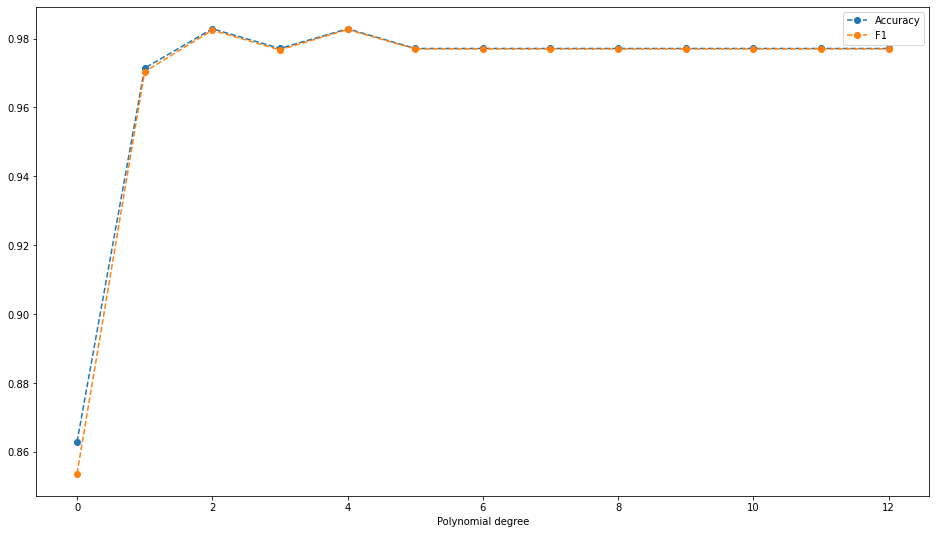

In [23]:
plt.figure(figsize=(16,9))

plt.plot(accuracy_poly, marker='o', linestyle='--', label='Accuracy')
plt.plot(f1_poly, marker='o', linestyle='--', label='F1')
plt.legend()
plt.xlabel('Polynomial degree')

In [24]:
degree = accuracy_poly.index(max(accuracy_poly))
svm = SVC(kernel='poly', C=degree)
svm.fit(moons_points_train, moons_labels_train)

print('Точность LogReg: {:0.3f}, F1 LogReg: {:0.3f}'.format(accuracy_poly[degree], f1_poly[degree]))
print('Точность SVM: {:0.3f}, F1 SVM: {:0.3f}'.format(accuracy_score(moons_labels_test, svm.predict(moons_points_test)), 
                                                      f1_score(moons_labels_test, svm.predict(moons_points_test))))

Точность LogReg: 0.983, F1 LogReg: 0.982
Точность SVM: 0.897, F1 SVM: 0.894


### Часть 2 
### Творческое задание

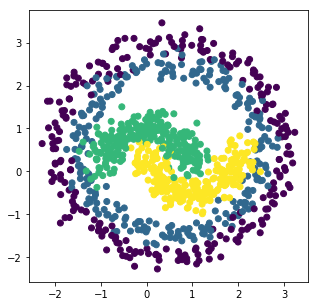

In [181]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

__Задание (4 балла):__ Сгенерирован довольно непростой датасет из 4 классов на плоскости. Обучайте на нём описанные выше модели, пробуйте преобразования признаков и признакового пространства, стараясь добиться наилучшего качества классификации с точки зрения f1-меры. Дополнительно можете попробовать иные модели, рассказанные на лекциях и семинарах, а также модели/алгоритмы, которые вам нравятся.

Визуализируйте разделяющие поверхности для каждого кейса обучения и сделайте выводы относительно результатов.

In [ ]:
pass